# Query the CUAHSI Hydroportal for SNOTEL data

Adapted from the [2021 SnowEX Hackweek tutorial by David Shean](https://snowex-2021.hackweek.io/tutorials/geospatial/SNOTEL_query.html)

__Note: this notebook (specifically the `ulmo` package) requires a different version of Python than the other notebooks that use `XDEM`, so I ran this using a separate `mamba` environment.__

In [1]:
import os
import glob
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import ulmo

## Define paths to data and variables to fetch

In [2]:
# Paths in directory
site_name = 'DCEW'
data_path = '/Users/raineyaberle/Research/PhD/SnowDEMs/'
out_path = os.path.join(data_path, site_name, 'snotel')
aoi_fn = glob.glob(os.path.join(data_path, site_name, 'site_bounds', f'{site_name}_bounds*.shp'))[0]

fetch_vars = ['SNOTEL:SNWD_D']
start_date = '2020-01-01'
end_date = '2024-06-07'

## Load Snotel sites from CUAHSI Hydroshare

In [3]:
wsdlurl = 'https://hydroportal.cuahsi.org/Snotel/cuahsi_1_1.asmx?WSDL'
sites = ulmo.cuahsi.wof.get_sites(wsdlurl)

# Adjust variables
sites_df = pd.DataFrame.from_dict(sites, orient='index').dropna()
sites_df['geometry'] = [Point(float(loc['longitude']), float(loc['latitude'])) for loc in sites_df['location']]
sites_df = sites_df.drop(columns='location')
sites_df = sites_df.astype({"elevation_m":float})

# Convert to geopandas.GeoDataFrame
sites_gdf = gpd.GeoDataFrame(sites_df, crs='EPSG:4326')
sites_gdf.head()

,code,name,network,elevation_m,site_property,geometry
SNOTEL:301_CA_SNTL,301_CA_SNTL,Adin Mtn,SNOTEL,1886.712036,"{'county': 'Modoc', 'state': 'California', 'si...",POINT (-120.79192 41.23583)
SNOTEL:907_UT_SNTL,907_UT_SNTL,Agua Canyon,SNOTEL,2712.719971,"{'county': 'Kane', 'state': 'Utah', 'site_comm...",POINT (-112.27118 37.52217)
SNOTEL:916_MT_SNTL,916_MT_SNTL,Albro Lake,SNOTEL,2529.840088,"{'county': 'Madison', 'state': 'Montana', 'sit...",POINT (-111.95902 45.59723)
SNOTEL:1267_AK_SNTL,1267_AK_SNTL,Alexander Lake,SNOTEL,48.768002,"{'county': 'Matanuska-Susitna', 'state': 'Alas...",POINT (-150.88966 61.74967)
SNOTEL:908_WA_SNTL,908_WA_SNTL,Alpine Meadows,SNOTEL,1066.800049,"{'county': 'King', 'state': 'Washington', 'sit...",POINT (-121.69847 47.77957)


## Filter SNOTEL sites by AOI

Site code: SNOTEL:978_ID_SNTL


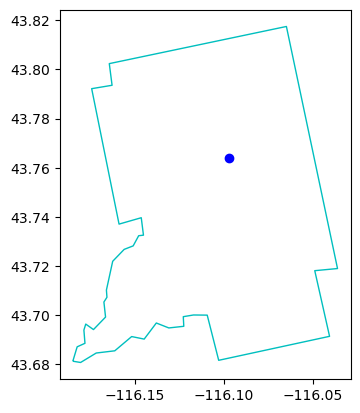

In [4]:
# Load site bounds
aoi = gpd.read_file(aoi_fn)
aoi = aoi.to_crs('EPSG:4326')

# Filter SNOTEL sits using site bounds
sites_filt_gdf = sites_gdf.loc[sites_gdf.intersects(aoi.geometry[0])]
site_code = sites_filt_gdf['code'].index[-1]
print(f'Site code: {site_code}')

# Plot AOI and SNOTEL site location(s)
fig, ax = plt.subplots()
aoi.plot(ax=ax, facecolor='None', edgecolor='c')
sites_filt_gdf.plot(ax=ax, color='b')
plt.show()

## Fetch data, save to file

Made directory for outputs: /Users/raineyaberle/Research/PhD/SnowDEMs/DCEW/snotel


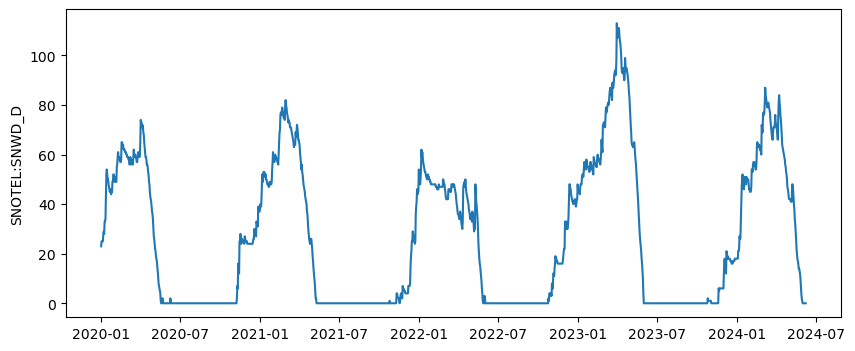

Data saved to file: /Users/raineyaberle/Research/PhD/SnowDEMs/DCEW/snotel/DCEW_SNOTEL_2020-01-01_2024-06-07.csv


,value,qualifiers,censor_code,date_time_utc,method_id,method_code,source_code,quality_control_level_code,variable
datetime,,,,,,,,,
2020-01-01 00:00:00+00:00,23,V,nc,2020-01-01T00:00:00,0,0,1,1,SNOTEL:SNWD_D
2020-01-02 00:00:00+00:00,25,V,nc,2020-01-02T00:00:00,0,0,1,1,SNOTEL:SNWD_D
2020-01-03 00:00:00+00:00,25,V,nc,2020-01-03T00:00:00,0,0,1,1,SNOTEL:SNWD_D
2020-01-04 00:00:00+00:00,25,V,nc,2020-01-04T00:00:00,0,0,1,1,SNOTEL:SNWD_D
2020-01-05 00:00:00+00:00,25,V,nc,2020-01-05T00:00:00,0,0,1,1,SNOTEL:SNWD_D
...,...,...,...,...,...,...,...,...,...
2024-06-03 00:00:00+00:00,0,V,nc,2024-06-03T00:00:00,0,0,1,1,SNOTEL:SNWD_D
2024-06-04 00:00:00+00:00,0,E,nc,2024-06-04T00:00:00,0,0,1,1,SNOTEL:SNWD_D
2024-06-05 00:00:00+00:00,0,V,nc,2024-06-05T00:00:00,0,0,1,1,SNOTEL:SNWD_D


In [5]:
def snotel_fetch(sitecode, variablecode='SNOTEL:SNWD_D', 
                 start_date='1950-10-01', end_date=datetime.today().strftime('%Y-%m-%d')):
    #print(sitecode, variablecode, start_date, end_date)
    values_df = None
    try:
        # Request data from the server
        site_values = ulmo.cuahsi.wof.get_values(wsdlurl, sitecode, variablecode, start=start_date, end=end_date)
        # Convert to a Pandas DataFrame   
        values_df = pd.DataFrame.from_dict(site_values['values'])
        # Parse the datetime values to Pandas Timestamp objects
        values_df['datetime'] = pd.to_datetime(values_df['datetime'], utc=True)
        # Set the DataFrame index to the Timestamps
        values_df = values_df.set_index('datetime')
        # Convert values to float and replace -9999 nodata values with NaN
        values_df['value'] = pd.to_numeric(values_df['value']).replace(-9999, np.nan)
        # Remove any records flagged with lower quality
        values_df = values_df[values_df['quality_control_level_code'] == '1']
    except:
        print("Unable to fetch %s" % variablecode)

    return values_df

# Check if output directory exists
if not os.path.exists(out_path):
    os.mkdir(out_path)
    print('Made directory for outputs:', out_path)

# Initialize dataframe
out_df = pd.DataFrame()

# Iterate over variables
for var in fetch_vars:
    # Define output file name
    out_fn = os.path.join(out_path, f'{site_name}_SNOTEL_{start_date}_{end_date}.csv')
    # Fetch data
    values_df = snotel_fetch(site_code, fetch_vars, start_date, end_date)
    values_df['variable'] = var
    out_df = pd.concat([out_df, values_df])
    # Plot variable
    plt.figure(figsize=(10,4))
    plt.plot(values_df.index, values_df['value'])
    plt.ylabel(var)
    plt.show()
    
# Save to file
out_df.to_csv(out_fn, index=True)
print('Data saved to file:', out_fn)

out_df
    